In [1]:
using Revise
using ProgressMeter
using Plots
using Statistics, RollingFunctions
includet("../experiment/cycleworld_rgtd.jl")

┌ Info: Precompiling GVFN [074592a8-c4f6-11e8-1d1b-391d13f2b9ea]
└ @ Base loading.jl:1273
┌ Warning: `@add_arg_table` is deprecated, use `@add_arg_table!` instead
└ @ ArgParse ~/Documents/Research/projects/GVFN/src/Environments.jl:18
┌ Warning: `@add_arg_table` is deprecated, use `@add_arg_table!` instead
└ @ ArgParse In[1]:5


In [2]:
function run_experiment(args, num_runs)
    results = Array{Dict}(undef, num_runs)

    prg_bar = Progress(num_runs)

    Threads.@threads for run in 1:num_runs
        t_args = copy(args)
        t_args["seed"] = run + 1029
        ret = CycleWorldRGTDExperiment.main_experiment(t_args; working=true, progress=false)
        results[run] = ret
        next!(prg_bar)
    end
    results
end    

run_experiment (generic function with 1 method)

In [26]:
num_runs = 50

┌ Warning: /Users/Matt/Documents/Research/projects/GVFN/src/GVFNetwork_act.jl no longer exists, deleting all methods
└ @ Revise /Users/Matt/.julia/packages/Revise/0KQ7U/src/Revise.jl:540


50

In [ ]:
args = Dict{String,Any}(
        "seed" => 1,
        "steps" => 100000,
        "chain" => 6,
        "opt" => "Descent",
        "truncation" => 3,

        "alpha" => 0.1,

        "lu" => "RGTD",
        "rgtd-alpha" => 0.3,
        "rgtd-beta" => 0.01,
        
        "act" => "sigmoid",
        "horde" => "chain",
        "gamma" => 0.9,

        "save_dir" => "cycleworld_rgtd")

results_chain_01 = run_experiment(args, num_runs);

Progress:  20%|████████▎                                |  ETA: 0:05:10

In [ ]:
args = Dict{String,Any}(
        "seed" => 1,
        "steps" => 100000,
        "chain" => 6,
        "opt" => "Descent",
        "truncation" => 3,

        "alpha" => 0.1,

        "lu" => "RGTD",
        "rgtd-alpha" => 0.3,
        "rgtd-beta" => 0.001,
        
        "act" => "sigmoid",
        "horde" => "chain",
        "gamma" => 0.95,

        "save_dir" => "cycleworld_rgtd")

results_chain_001 = run_experiment(args, num_runs);

In [ ]:
args = Dict{String,Any}(
        "seed" => 1,
        "steps" => 100000,
        "chain" => 6,
        "opt" => "Descent",
        "truncation" => 3,

        "alpha" => 0.1,

        "lu" => "RGTD",
        "rgtd-alpha" => 0.3,
        "rgtd-beta" => 0.001,
#         "scale"=>0.00005f0
        
        "act" => "sigmoid",
        "horde" => "gamma_chain",
        "gamma" => 0.9,

        "save_dir" => "cycleworld_rgtd")

results_gamma_chain = run_experiment(args, num_runs);

In [ ]:
args = Dict{String,Any}(
        "seed" => 1,
        "steps" => 100000,
        "chain" => 6,
        "opt" => "Descent",
        "truncation" => 3,

        "alpha" => 0.1,

        "lu" => "RGTD",
        "rgtd-alpha" => 0.3,
        "rgtd-beta" => 0.01,
#         "scale"=>0.00005f0
        
        "act" => "sigmoid",
        "horde" => "gamma_chain",
        "gamma" => 0.9,

        "save_dir" => "cycleworld_rgtd")

results_gamma_chain_01 = run_experiment(args, num_runs);

In [ ]:
function plot_results(results_arr; kwargs...)    
    clean_res = Array{Float32}[]
    for i in 1:num_runs
        push!(clean_res, rollmean(abs.(results_arr[i]["out_err_strg"]), 100)[1:100:end])
    end
    plot(mean(clean_res), ribbon = std(clean_res)./sqrt(num_runs); kwargs...)
end

function plot_results(results_arrs::Array{<:AbstractArray, 1}; kwargs...)
    
    clean_res_all = Tuple{Array{Float32}, Array{Float32}}[]
    for results_arr in results_arrs
        clean_res = Array{Float32}[]
        for i in 1:num_runs
            push!(clean_res, rollmean(abs.(results_arr[i]["out_err_strg"]), 100)[1:100:end])
        end
        push!(clean_res_all, (mean(clean_res), std(clean_res)./sqrt(num_runs)))
    end
    plt = plot(clean_res_all[1][1], ribbon = clean_res_all[1][2]; kwargs...)
    for i in 2:length(results_arrs)
        plot!(plt, clean_res_all[i][1], ribbon = clean_res_all[i][2]; kwargs...)
    end
    plt
end

function plot_all_curves(results_arr; kwargs...)
    clean_res = Array{Float32}[]
    for i in 1:num_runs
        push!(clean_res, rollmean(abs.(results_arr[i]["out_err_strg"]), 100)[1:100:end])
    end
#     plot(mean(clean_res), ribbon = std(clean_res)./sqrt(num_runs))
    plot(clean_res; legend=nothing, kwargs...)
end

function plot_a_curve(results_arr, idx; kwargs...)
    clean_res = Array{Float32}[]
    for i in idx
        push!(clean_res, rollmean(abs.(results_arr[i]["out_err_strg"]), 100)[1:100:end])
    end
#     plot(mean(clean_res), ribbon = std(clean_res)./sqrt(num_runs))
    plot(clean_res; legend=nothing, kwargs...)
end

function plot_all_curves_grid(results_arr; kwargs...)
    plts = []
    for i in 1:length(results_arr)
        push!(plts, plot_a_curve(results_arr, i))
    end
    plot(plts...; xaxis=nothing, yaxis=nothing, kwargs...)
end




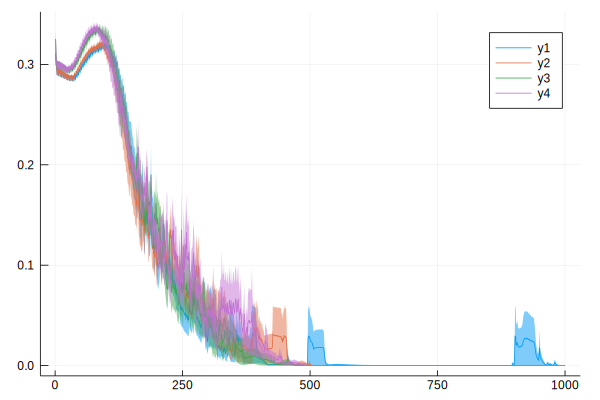

In [9]:
# cur_arr = results_chain_001
plt1 = plot_results([results_chain_001, results_chain_01, results_gamma_chain, results_gamma_chain_01])
# plt2 = plot_all_curves(cur_arr)
# plt2 = plot_a_curve(cur_arr, 10)

# plot(plt1, plt2, size=(1000, 300))


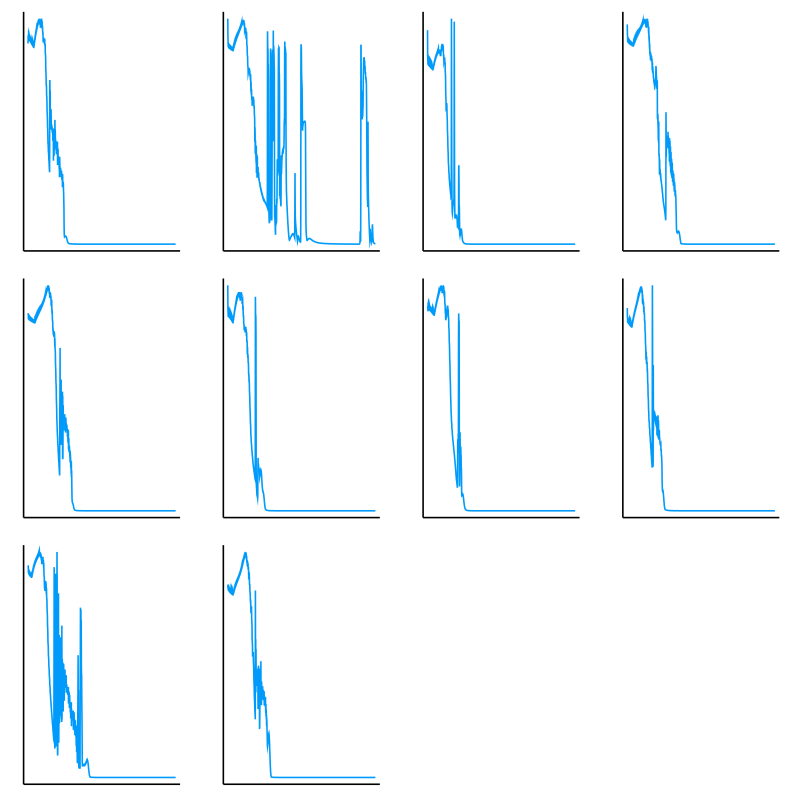

In [22]:

# size(results_chain_001)
plot_all_curves_grid(results_chain_001, size=(800, 800), fmt=:png)
# plot_a_curve(results_chain_001, 1)

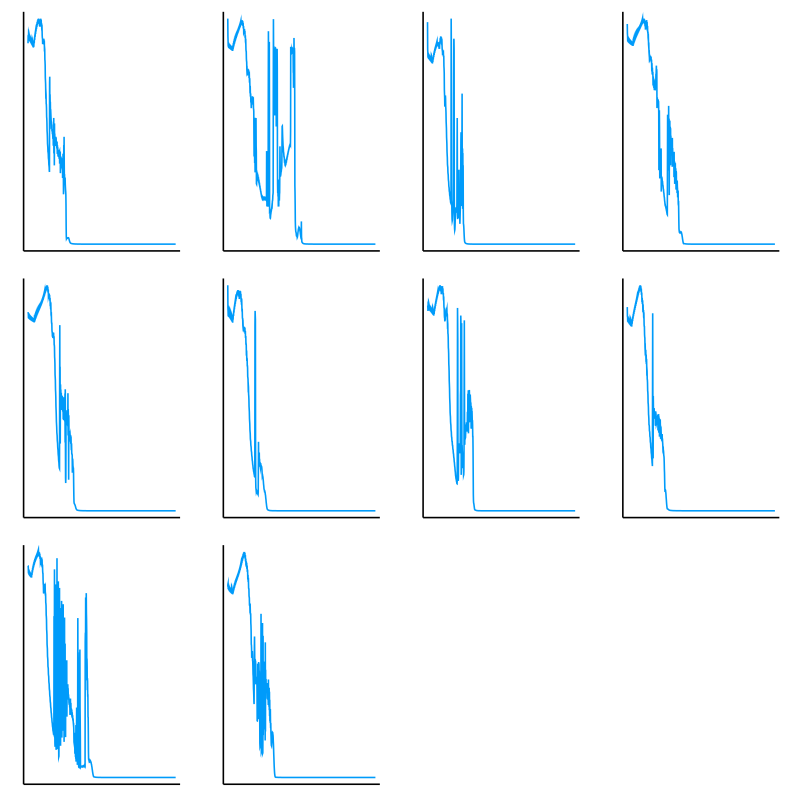

In [23]:
plot_all_curves_grid(results_chain_01, size=(800, 800), fmt=:png)

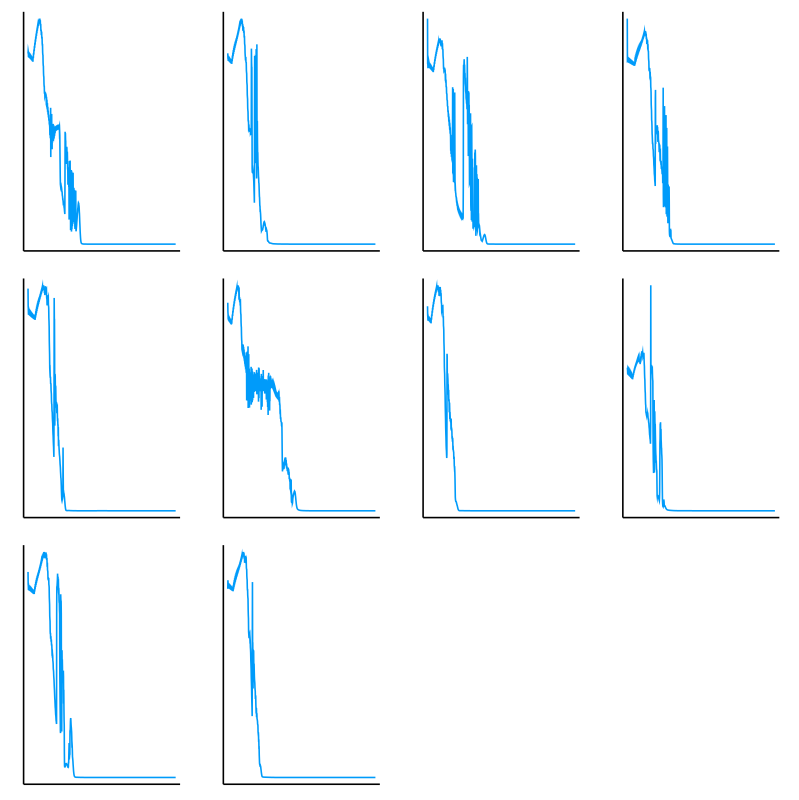

In [24]:
plot_all_curves_grid(results_gamma_chain, size=(800, 800), fmt=:png)

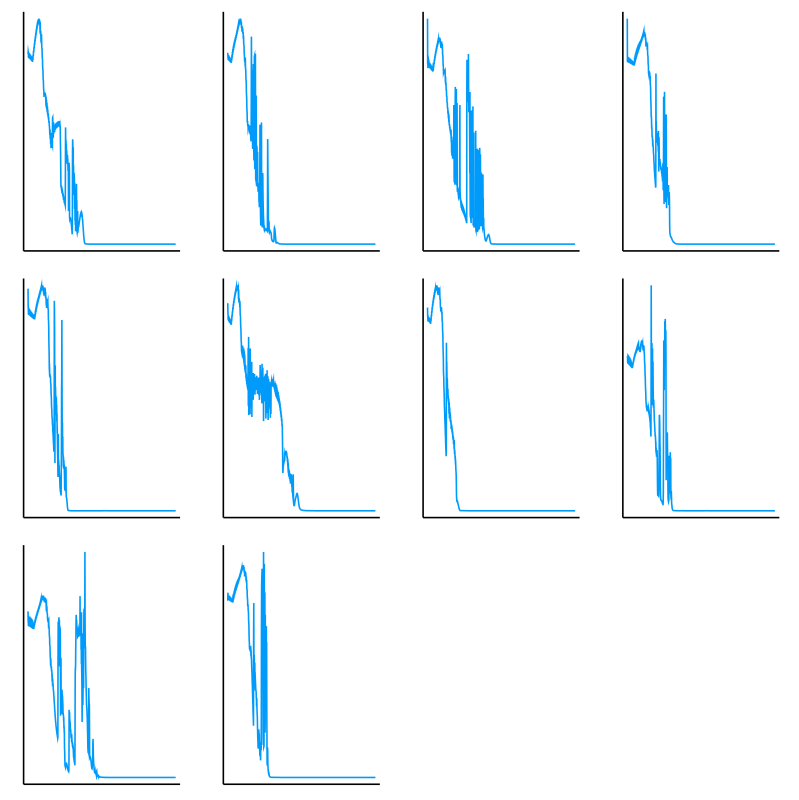

In [25]:
plot_all_curves_grid(results_gamma_chain_01, size=(800, 800), fmt=:png)